<a href="https://colab.research.google.com/github/eldercamposds/VisaoComputacional/blob/main/areas_arborizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np

img = Image.open("/content/imagem_2025-11-09_185026810.png")
img_array = np.array(img)


In [ ]:
# Assuming the image is RGB and you want to calculate NDVI using Red and Green bands as an approximation
# If you have an image with an NIR band, please load that image and adjust the indices accordingly.
green = img_array[:, :, 1].astype(float)  # Assuming Green band is at index 1
red = img_array[:, :, 0].astype(float)  # Assuming Red band is at index 0

# Approximate NDVI using Green and Red bands
# If you have an NIR band, replace 'green' with your NIR band data
ndvi = (green - red) / (green + red)

/tmp/ipython-input-2443446115.py:8: RuntimeWarning: invalid value encountered in divide
  ndvi = (green - red) / (green + red)


In [ ]:
import cv2

hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

vegetation_area = cv2.bitwise_and(img_array, img_array, mask=mask)


In [ ]:
# Step 2: Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (171851, 3)
Shape of X_test: (73651, 3)
Shape of y_train: (171851,)
Shape of y_test: (73651,)


In [ ]:
# Step 1: Prepare training data

# Reshape the image array and mask to be 2D arrays of pixels
# This will make it easier to work with in scikit-learn
img_reshaped = img_array.reshape(-1, img_array.shape[-1])
mask_reshaped = mask.flatten()

# Use the reshaped image data as features (X)
X = img_reshaped

# Use the reshaped mask data as labels (y)
# The mask values are 0 (non-vegetation) and 255 (vegetation).
# We can convert them to 0 and 1 for binary classification.
y = (mask_reshaped > 0).astype(int)

print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

Shape of features (X): (245502, 3)
Shape of labels (y): (245502,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# X = características (ex.: valores RGB ou NDVI)
# y = rótulos (vegetação ou não)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


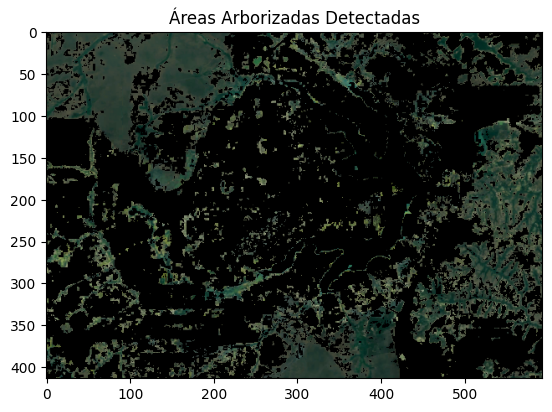

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(vegetation_area)
plt.title("Áreas Arborizadas Detectadas")
plt.show()
